In [22]:
# general libraries
import numpy as np
import pandas as pd
import time
import sys
import seaborn as sns
import matplotlib.pyplot as plt

# tensorflow libraries
import tensorflow as tf
import os
import tensorflow.keras as keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [25]:
from keras.datasets import mnist
import numpy as np
(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()

In [26]:
mnist_x_train = mnist_x_train.astype('float32') / 255.
mnist_x_test = mnist_x_test.astype('float32') / 255.
mnist_x_train = mnist_x_train.reshape((len(mnist_x_train), np.prod(mnist_x_train.shape[1:])))
mnist_x_test = mnist_x_test.reshape((len(mnist_x_test), np.prod(mnist_x_test.shape[1:])))

In [27]:
from keras.datasets import fashion_mnist
import numpy as np
(fashion_x_train, fashion_y_train), (fashion_x_test, fashion_y_test) = fashion_mnist.load_data()

In [28]:
fashion_x_train = fashion_x_train.astype('float32') / 255.
fashion_x_test = fashion_x_test.astype('float32') / 255.
fashion_x_train = fashion_x_train.reshape((len(fashion_x_train), np.prod(fashion_x_train.shape[1:])))
fashion_x_test = fashion_x_test.reshape((len(fashion_x_test), np.prod(fashion_x_test.shape[1:])))

In [29]:
x_test = np.concatenate((mnist_x_test, fashion_x_test[0].reshape(1,784)))
print(x_test.shape)

(10001, 784)


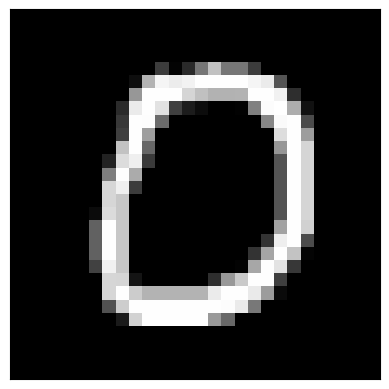

In [30]:
plt.gray()
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, 
                labelbottom = False) 
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, 
                labelleft = False)

plt.imshow(mnist_x_test[10].reshape(28, 28))

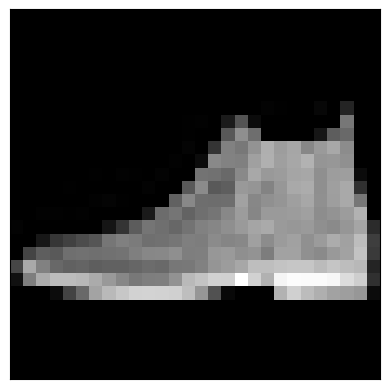

In [31]:
plt.gray()
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, 
                labelbottom = False) 
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, 
                labelleft = False)

plt.imshow(fashion_x_test[0].reshape(28, 28))
plt.show()

In [32]:
def create_autoencoders(feature_layer_dim = 16):
  input_img = Input(shape = (784,), name = 'Input_Layer')
  # 784 is the total number of pixels of MNIST images

  # The layer encoded has a dimension equal to feature_layer_dim and contains
  # the encoded input (therefore the name)
  encoded = Dense(feature_layer_dim, activation = 'relu', name = 'Encoded_Features')(input_img)
  decoded = Dense(784, activation = 'sigmoid', name = 'Decoded_Input')(encoded)

  autoencoder = Model(input_img, decoded)
  encoder = Model(input_img, encoded)

  encoded_input = Input(shape = (feature_layer_dim,))
  decoder = autoencoder.layers[-1]
  decoder = Model(encoded_input, decoder(encoded_input))

  return autoencoder, encoder, decoder

In [33]:
autoencoder, encoder, decoder = create_autoencoders(64)
keras.utils.plot_model(autoencoder, show_shapes = True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [34]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [45]:
history = autoencoder.fit(mnist_x_train, mnist_x_train,
                          epochs = 30,
                          batch_size = 256,
                          shuffle = True,
                          validation_data = (mnist_x_test, mnist_x_test),
                          verbose = 0)
autoencoder.save('autoencoder_model.h5')

In [36]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [37]:
RE = ((x_test - decoded_imgs)**2).mean(axis = 1)
RE_original = RE.copy()
RE[-1]

0.05737761

In [38]:
RE.sort()
print(RE[9990:])

[0.01673208 0.01683499 0.01685044 0.01689363 0.01715135 0.01741298
 0.0174286  0.01807334 0.01862004 0.01961629 0.05737761]


In [39]:
biggest_re_pos = np.argmax(RE_original)

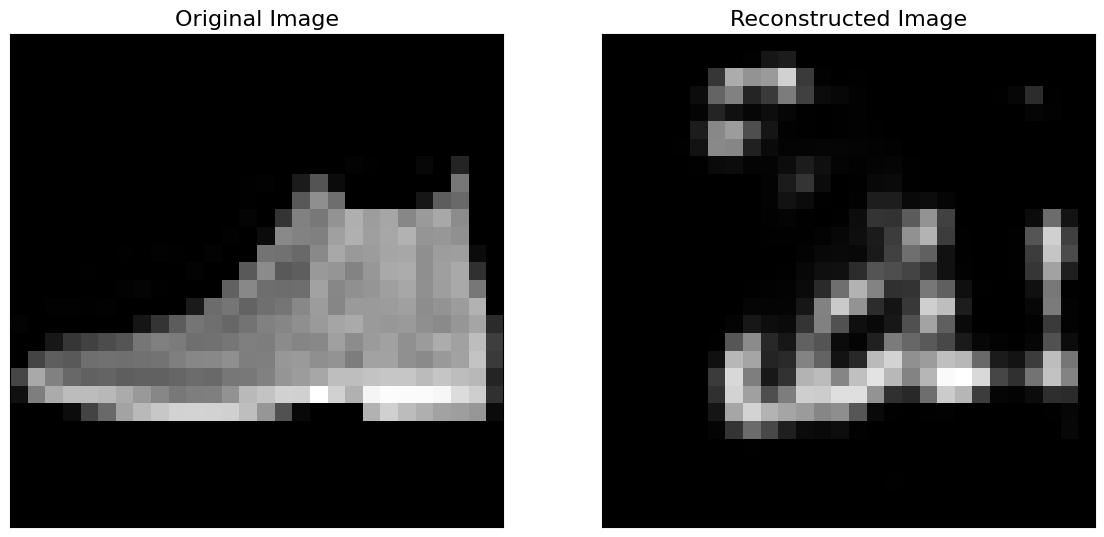

In [40]:
fig = plt.figure(figsize = (14, 7))

ax = fig.add_subplot(1, 2, 1)
plt.title('Original Image', fontsize = 16)

plt.gray()
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, 
                labelbottom = False) 
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, 
                labelleft = False)

plt.imshow(x_test[biggest_re_pos].reshape(28, 28))

ax = fig.add_subplot(1, 2, 2)
plt.title('Reconstructed Image', fontsize = 16)
plt.gray()
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, 
                labelbottom = False) 
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, 
                labelleft = False)

plt.imshow(decoded_imgs[biggest_re_pos].reshape(28, 28))

In [41]:
second_biggest_re_pos = list(RE_original).index(RE[-2])

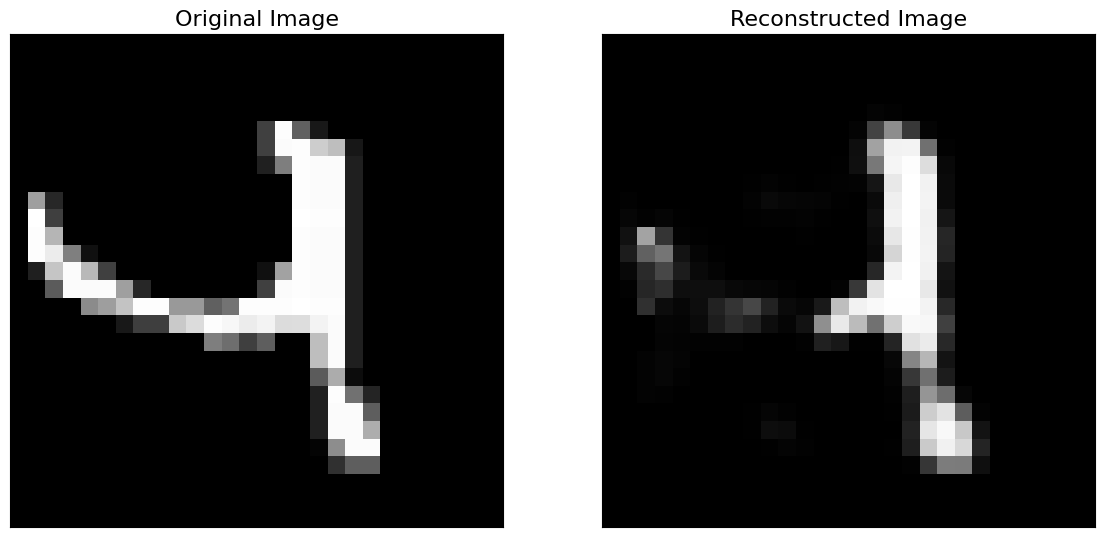

In [42]:
fig = plt.figure(figsize = (14, 7))

ax = fig.add_subplot(1, 2, 1)
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, 
                labelbottom = False) 
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, 
                labelleft = False)
plt.title('Original Image', fontsize = 16)
plt.gray()
plt.imshow(x_test[second_biggest_re_pos].reshape(28, 28))

ax = fig.add_subplot(1, 2, 2)
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, 
                labelbottom = False) 
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, 
                labelleft = False)
plt.title('Reconstructed Image', fontsize = 16)
plt.gray()
plt.imshow(decoded_imgs[second_biggest_re_pos].reshape(28, 28))

In [43]:
third_biggest_re_pos = list(RE_original).index(RE[-3])

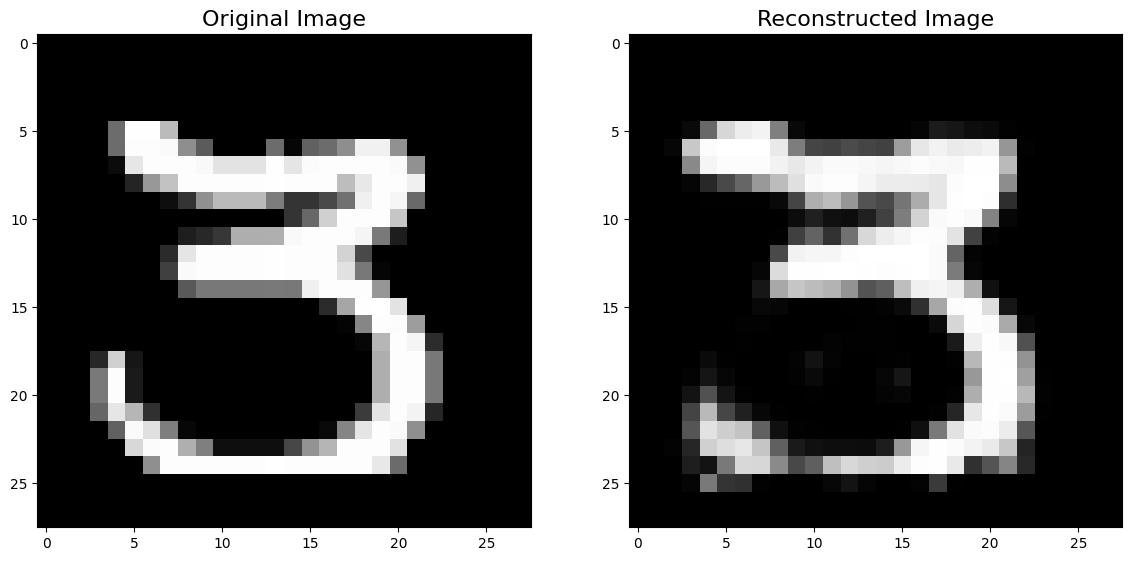

In [44]:
fig = plt.figure(figsize = (14, 7))

ax = fig.add_subplot(1, 2, 1)
plt.title('Original Image', fontsize = 16)
plt.gray()
plt.imshow(x_test[third_biggest_re_pos].reshape(28,28))

ax = fig.add_subplot(1, 2, 2)
plt.title('Reconstructed Image', fontsize = 16)
plt.gray()
plt.imshow(decoded_imgs[third_biggest_re_pos].reshape(28,28))